##Exploring multidimensional data using xray

Here is a little graphical representation of the way to think about this data. For clarification on how multidimensional data are represented in xray, visit: http://xray.readthedocs.org/en/latest/

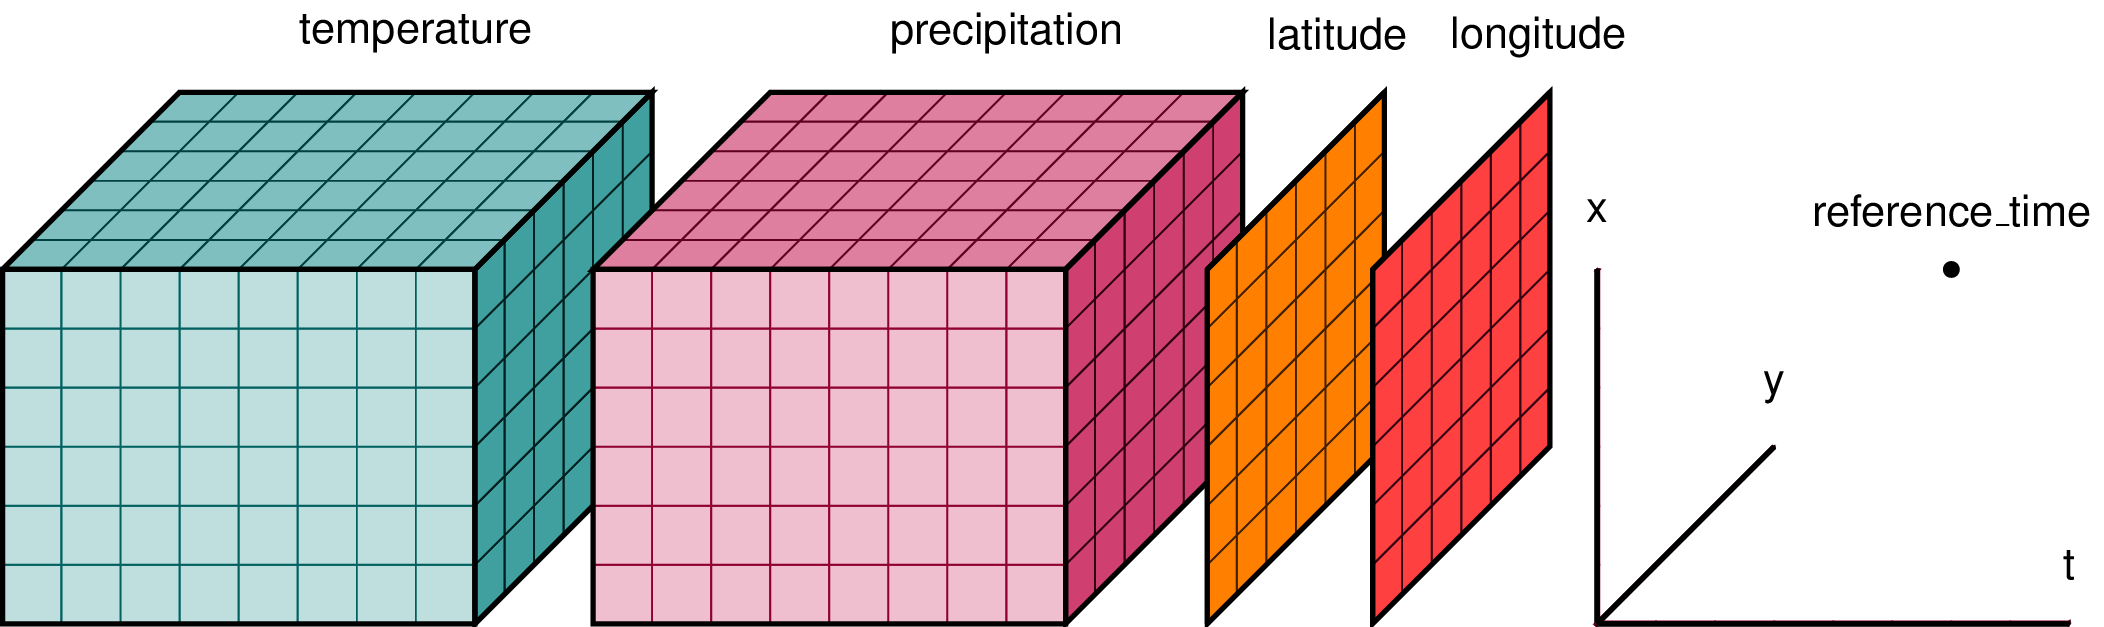

In [50]:
from IPython.display import Image
Image(url='http://xray.readthedocs.org/en/latest/_images/dataset-diagram.png', embed=True, width=950, height=300)

## Loading an example file into a dataset

In [2]:
import numpy as np
import pandas as pd
import xray

This is an example of what our soil moisture data from the radio tower install will look like. Each site has a lat, lon, and elevation and at the site we will record rainfall as well as soil temp and soil moisture at two depths. So there are up to 3 dimensions along which the data are recorded: site, depth, and time.

In [157]:
temp = 15 + 8 * np.random.randn(2, 2, 3)
VW = 15 + 10 * abs(np.random.randn(2, 2, 3))
precip = 10 * np.random.rand(2, 3)
depths = [5, 20]
lons = [-99.83, -99.79]
lats = [42.63, 42.59]
elevations = [1600, 1650]

ds = xray.Dataset({'temperature': (['site', 'depth', 'time'],  temp, {'units':'C'}),
                   'soil_moisture': (['site', 'depth', 'time'],  VW, {'units':'percent'}),
                   'precipitation': (['site', 'time'], precip, {'units':'mm'})},
                   coords={'lon': (['site'], lons, {'units':'degrees east'}),
                           'lat': (['site'], lats, {'units':'degrees north'}),
                           'elevation': (['site'], elevations, {'units':'m'}),
                           'site': ['Acacia', 'Riverine'],
                           'depth': (['depth'], depths, {'units': 'cm'}),
                           'time': pd.date_range('2015-05-19', periods=3)})

In [160]:
ds

<xray.Dataset>
Dimensions:        (depth: 2, site: 2, time: 3)
Coordinates:
    elevation      (site) int32 1600 1650
    lon            (site) float64 -99.83 -99.79
  * site           (site) |S8 'Acacia' 'Riverine'
  * depth          (depth) int32 5 20
  * time           (time) datetime64[ns] 2015-05-19 2015-05-20 2015-05-21
    lat            (site) float64 42.63 42.59
Data variables:
    soil_moisture  (site, depth, time) float64 17.72 20.19 19.52 16.74 22.2 17.81 22.58 29.29 ...
    precipitation  (site, time) float64 7.758 2.609 5.31 6.88 3.518 7.402
    temperature    (site, depth, time) float64 20.15 13.56 17.86 2.85 28.33 26.84 23.02 23.42 ...

## Inspecting and selecting from dataset 

To select the data for a specific site we just write:

In [78]:
ds.sel(site='Acacia')

<xray.Dataset>
Dimensions:        (depth: 2, time: 3)
Coordinates:
    elevation      int32 1600
    lon            float64 -99.83
    site           |S8 'Acacia'
  * depth          (depth) int32 5 20
  * time           (time) datetime64[ns] 2015-05-19 2015-05-20 2015-05-21
    lat            float64 42.63
Data variables:
    soil_moisture  (depth, time) float64 24.41 19.95 15.84 32.46 26.06 31.47
    precipitation  (time) float64 1.336 3.028 6.94
    temperature    (depth, time) float64 18.64 4.586 19.83 13.92 6.021 16.56

Now if we are only interested in soil moisture at the upper depth at a specific time, we can pull out just that one data point:

In [86]:
print ds.soil_moisture.sel(site='Acacia', time='2015-05-19', depth=5).values

24.406695578


For precip there are no depth values, so a specific data point can be pulled just by selecting for time and site:

In [87]:
print ds.precipitation.sel(site='Acacia', time='2015-05-19').values

1.33578699309


## Test what this dataset looks like in pandas and netCDF

In [159]:
ds.to_dataframe()

elevation    lat    lon  precipitation  \
depth site     time                                                 
5     Acacia   2015-05-19       1600  42.63 -99.83       7.758492   
               2015-05-20       1600  42.63 -99.83       2.608799   
               2015-05-21       1600  42.63 -99.83       5.310404   
      Riverine 2015-05-19       1650  42.59 -99.79       6.879788   
               2015-05-20       1650  42.59 -99.79       3.517897   
               2015-05-21       1650  42.59 -99.79       7.402098   
20    Acacia   2015-05-19       1600  42.63 -99.83       7.758492   
               2015-05-20       1600  42.63 -99.83       2.608799   
               2015-05-21       1600  42.63 -99.83       5.310404   
      Riverine 2015-05-19       1650  42.59 -99.79       6.879788   
               2015-05-20       1650  42.59 -99.79       3.517897   
               2015-05-21       1650  42.59 -99.79       7.402098   

                           soil_moisture  temperature  
depth site     time                                    
5     Acacia   2015-05-19      17.720828    20.147849  
               2015-05-20      20.193978    13.557683  
               2015-05-21      19.523205    17.860653  
      Riverine 2015-05-19      22.584659    23.021184  
               2015-05-20      29.291780    23.419283  
               2015-05-21      21.350879    10.456177  
20    Acacia   2015-05-19      16.744923     2.850314  
               2015-05-20      22.199239    28.333528  
               2015-05-21      17.805616    26.836107  
      Riverine 2015-05-19      17.621124     9.753252  
               2015-05-20      20.993098    20.933177  
               2015-05-21      16.533786    -3.296932

In [74]:
ds.to_netcdf('test.nc')

## Going back and forth between datasets and dataframes

In [182]:
sites = ['MainTower']  # can be replaced if there are more specific sites
lons = [36.8701]       # degrees east
lats = [0.4856]        # degrees north
elevations = [1610]    # m above see level

coords={
'site': (['site'], sites),
'lon': (['site'], lons, dict(units='degrees east',
                             standard_name='longitude',
                             axis='X')),
'lat': (['site'], lats, dict(units='degrees north',
                             standard_name='latitude',
                             axis='Y')),
'elevation': (['site'], elevations, dict(units='m',
                                         standard_name='elevation',
                                         positive='up',
                                         axis='Z')),
'time': pd.date_range('2015-05-19', periods=3)}

precip = 10 * np.random.rand(1, 3)
ds = xray.Dataset({'precipitation': (['site', 'time'], precip, {'units':'mm'})},
                   coords=coords)
ds

<xray.Dataset>
Dimensions:        (site: 1, time: 3)
Coordinates:
    lat            (site) float64 0.4856
    elevation      (site) int32 1610
    lon            (site) float64 36.87
  * site           (site) |S9 'MainTower'
  * time           (time) datetime64[ns] 2015-05-19 2015-05-20 2015-05-21
Data variables:
    precipitation  (site, time) float64 2.222 8.94 5.194

In [183]:
df = ds.to_dataframe()
df

elevation     lat      lon  precipitation
site      time                                                 
MainTower 2015-05-19       1610  0.4856  36.8701       2.222308
          2015-05-20       1610  0.4856  36.8701       8.939745
          2015-05-21       1610  0.4856  36.8701       5.193512

In [185]:
df.index

MultiIndex(levels=[[u'MainTower'], [2015-05-19 00:00:00, 2015-05-20 00:00:00, 2015-05-21 00:00:00]],
           labels=[[0, 0, 0], [0, 1, 2]],
           names=[u'site', u'time'])

## Loading dataframes and transfering to datasets

In [39]:
from TOA5_to_netcdf import *

In [18]:
lons = [36.8701]       # degrees east
lats = [0.4856]        # degrees north
elevations = [1610]    # m above see level

coords={
'lon': (['site'], lons, dict(units='degrees east')),
'lat': (['site'], lats, dict(units='degrees north')),
'elevation': (['site'], elevations, dict(units='m'))}

In [19]:
input_file = 'E:/CR216_SN22030_soil.dat'
input_dict = {'has_header': True,
              'header_file': input_file,
              'datafile': 'soil',
              'path': 'E:/',
              'filename': 'CR216_SN22030_soil.dat'}

In [20]:
df = createDF(input_file, input_dict, attrs)[0]
ds = createDS(df, input_dict, attrs, local_attrs, site, coords_vals)
ds.to_netcdf(path='test2.nc', format='NETCDF3_64BIT')
xray.open_dataset('test2.nc')